In [ ]:
# Import Required Libraries
# Install
# pip install pandas yfinance matplotlib seaborn
# Import
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol
ticker = "AAPL" #Exp:Apple

# Fetch the stock data
apple = yf.Ticker(ticker)

# Get historical market data
df = apple.history(period="5y")

# Fetch fundamental data
financials = apple.financials
balance_sheet = apple.balance_sheet
cashflow = apple.cashflow

# Print key financial metrics
print("Revenue:", financials.loc["Total Revenue"].iloc[0])
print("Net Income:", financials.loc["Net Income"].iloc[0])
print("EPS:", financials.loc["Diluted EPS"].iloc[0])

# Save to CSV for analysis
df.to_csv("C:/Users/rache/Downloads/apple_stock_data.csv")
print(df.head())
print("Apple stock data saved successfully!")

Revenue: 391035000000.0
Net Income: 93736000000.0
EPS: 6.08
                                Open       High        Low      Close  \
Date                                                                    
2020-02-03 00:00:00-05:00  73.753365  75.980751  73.249237  74.810104   
2020-02-04 00:00:00-05:00  76.421868  77.471336  76.014687  77.279861   
2020-02-05 00:00:00-05:00  78.411751  78.712296  77.304123  77.910049   
2020-02-06 00:00:00-05:00  78.181511  78.823791  77.621635  78.821365   
2020-02-07 00:00:00-05:00  78.318454  78.568688  77.256782  77.749962   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-02-03 00:00:00-05:00  173788400     0.0000           0.0  
2020-02-04 00:00:00-05:00  136616400     0.0000           0.0  
2020-02-05 00:00:00-05:00  118826800     0.0000           0.0  
2020-02-06 00:00:00-05:00  105425600     0.0000           0.0  
2020-02-07 00:00:00-05:00  117684000     0.1

Epoch 1/10


C:\Users\rache\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0415 - val_loss: 0.0092
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.8648e-04 - val_loss: 0.0016
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.9993e-04 - val_loss: 0.0016
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.3806e-04 - val_loss: 0.0012
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.7001e-04 - val_loss: 0.0019
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.3384e-04 - val_loss: 0.0016
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.1395e-04 - val_loss: 0.0014
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.1590e-04 - val_loss: 0.0015
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.3604e-04 - val_loss: 7.5469e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


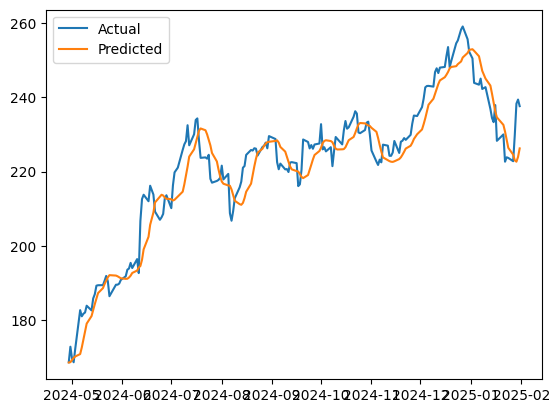

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data
df = pd.read_csv("C:/Users/rache/Downloads/apple_stock_data.csv", usecols=["Date", "Close"], parse_dates=["Date"], index_col="Date")

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
df["Close"] = scaler.fit_transform(df["Close"].values.reshape(-1,1))

# Prepare training data
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i+time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, Y_train = create_dataset(train_data.values, time_step)
X_test, Y_test = create_dataset(test_data.values, time_step)

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step,1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_data=(X_test, Y_test))

# Predict and visualize
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.plot(df.index[-len(predictions):], scaler.inverse_transform(Y_test.reshape(-1,1)), label="Actual")
plt.plot(df.index[-len(predictions):], predictions, label="Predicted")
plt.legend()
plt.show()